In [1]:
# Vertical temperature profiles
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

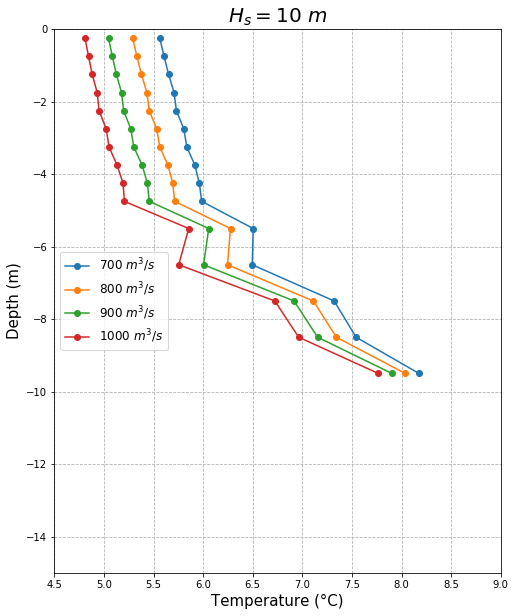

In [16]:
Hs = 10 # Sill depth
Qf = np.linspace(700, 1000, 4, dtype='i') # Freshwater discharge


fig, ax =plt.subplots(figsize=(8,10))
ax.set_xlim([4.5, 9])
ax.set_ylim([-15, 0])
plt.grid(linestyle='--')
#plt.yticks(fontsize = 15)
#plt.xticks(fontsize = 15)
plt.xlabel('Temperature (\N{DEGREE SIGN}C)', size = 15)
plt.ylabel('Depth (m)',size = 15)
plt.title('$H_s =$' + str(Hs) + ' $m$',fontsize=20)

files = sorted(glob.glob('/Users/weiyangbao/Desktop/State/' + str(format(Hs,'03d')) + '/state*.nc'))
T_amb = np.empty(len(files))
T_ver = np.empty(50)
for i in range(len(files)):
    state0 = xr.open_dataset(files[i])
    t0 = 60 # Start from day 30
    tn = len(state0.T) # End day
    state = state0.isel(Y=range(1,10), T=range(t0,tn)) # Remove the boundary walls in y direction
    depth = state.Z.data
    T_front = state.Temp.isel(X=28).data.mean(0)
    T_ver = T_front.mean(1) # Vertical profiles
    T_amb[i] = T_front.mean()
    
    ax.plot(T_ver[:15],depth[:15],'o-',label=str(Qf[i])+' $m^3/s$')
    #ax.xaxis.set_label_position('top') # this moves the label to the top
    #ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
    plt.legend(loc = 'center left', fontsize = 12)

fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Qsm/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig.savefig(fig_path + '/'+str(Hs)+'Tprof_sill.png', dpi = 150, bbox_inches='tight')